# Imports

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the data

In [2]:
data = pd.read_csv(r"D:\MY DATA\PYTHON DATA SCIENCE\Tweets.csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [4]:
data.shape

(14640, 15)

# Handling missing values

In [5]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [6]:
data.index.size

14640

In [7]:
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

If missing data or null values are more than 90% then we can drop that column which does not affect the original data. 

In [8]:
del(data['airline_sentiment_gold'], data['negativereason_gold'], data['tweet_coord'])

In [9]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [10]:
sentiment_counts = data.airline_sentiment.value_counts()
number_of_tweets = data.tweet_id.count()
print(number_of_tweets,'\n')
print(sentiment_counts)

14640 

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


In [11]:
print(data['airline'].unique())

['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']


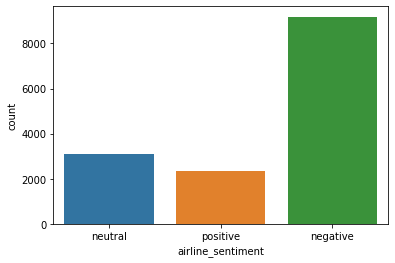

In [12]:
sns.countplot(x='airline_sentiment',data=data)

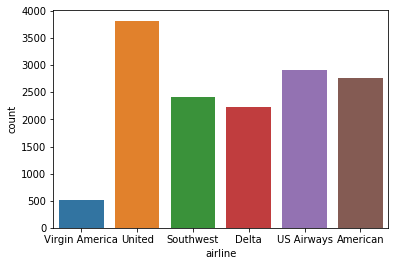

In [13]:
sns.countplot(x='airline',data=data)

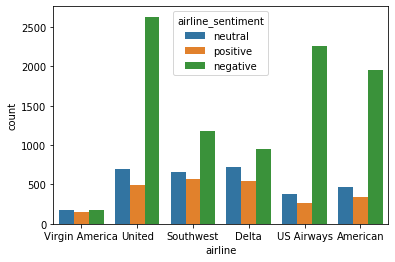

In [14]:
sns.countplot(x ='airline', hue = "airline_sentiment", data = data)

In [15]:
data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [16]:
airlines_list = list(data['airline'].unique())
airlines_list

['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American']

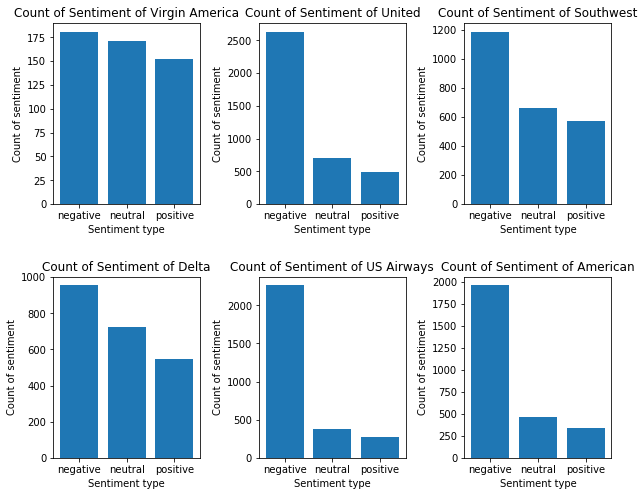

In [17]:
plt.figure(1, figsize = (10, 8))
for i in range(6):
    plt.subplot(2,3,i+1)
    df = data[data['airline'] == airlines_list[i]]
    y =df['airline_sentiment'].value_counts()
    x = y.index
    
    plt.bar(x,y)
    plt.ylabel('Count of sentiment')
    plt.xlabel('Sentiment type')
    plt.title('Count of Sentiment of '+airlines_list[i])
plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.show()

In [18]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [19]:
data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

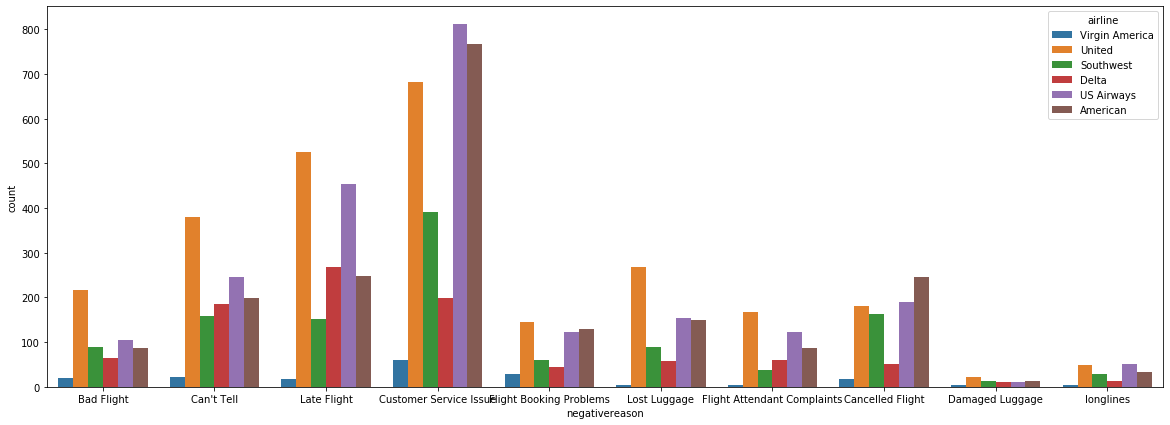

In [20]:
#Plotting of 'negative reasons'

plt.figure(figsize=(20,7))
sns.countplot(x ='negativereason', hue = "airline", data = data)

In [21]:
from wordcloud import WordCloud,STOPWORDS

In [22]:
df=data[data['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS, 
                      background_color='black', 
                      width=2000, height=2000).generate(cleaned_word)

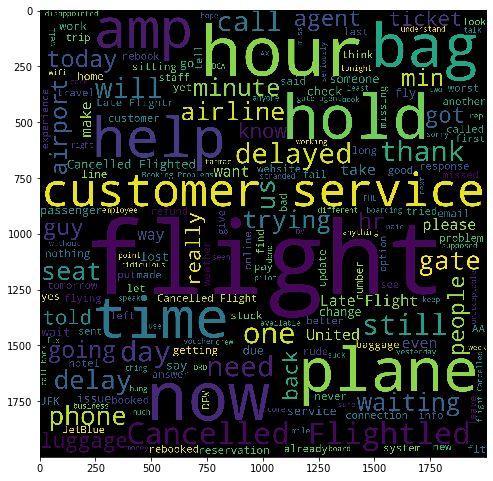

In [23]:
plt.figure(1,figsize=(8, 10))
plt.imshow(wordcloud)
#plt.axis('off')
plt.show()

In [24]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [25]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [26]:
data['sentiment']=data['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

# Training of dataset

In [27]:
data['clean_tweet']=data['text'].apply(lambda x: tweet_to_words(x))
data['Tweet_length']=data['text'].apply(lambda x: clean_tweet_length(x))

train,test = train_test_split(data, test_size=0.2, random_state=42)

In [28]:
data['clean_tweet']

0                              virginamerica dhepburn said
1        virginamerica plus added commercials experienc...
2        virginamerica today must mean need take anothe...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank got different flight chicago
14636    americanair leaving minutes late flight warnin...
14637    americanair please bring american airlines bla...
14638    americanair money change flight answer phones ...
14639    americanair ppl need know many seats next flig...
Name: clean_tweet, Length: 14640, dtype: object

In [29]:
data['Tweet_length']

0         3
1         6
2         8
3        11
4         5
         ..
14635     6
14636    14
14637     6
14638     9
14639    15
Name: Tweet_length, Length: 14640, dtype: int64

In [30]:
train['clean_tweet']

750                   united offering us rooms people fail
6875     jetblue jfk nyc staff amazing lax jetblue send...
7598     jetblue well last update right direction least...
14124    americanair flight still sitting dfw waiting b...
6187     southwestair companion pass broken today purch...
                               ...                        
5191     southwestair replacing vitaminwater beer bravo...
13418    americanair lax service reps hand number call ...
5390            southwestair hold hour chance someone help
860      united would contact discuss poor experiences ...
7270     jetblue ok sure seemed like jetblue tweeted us...
Name: clean_tweet, Length: 11712, dtype: object

In [31]:
test['clean_tweet']

4794     southwestair early frontrunner best airline os...
10480    usairways flt ewr cancelled flightled yet flts...
8067     jetblue going bdl dca flights yesterday today ...
8880                           jetblue depart washington c
8292                          jetblue probably find ticket
                               ...                        
11765                 usairways hold hours know keep money
14156                   americanair hard catering ready go
10963    usairways americanair finalstretch chairman ex...
4877                  southwestair well need something aim
5206        southwestair please please please answer phone
Name: clean_tweet, Length: 2928, dtype: object

In [32]:
train_clean_data=[]
for tweet in train['clean_tweet']:
    train_clean_data.append(tweet)
    
test_clean_data=[]
for tweet in test['clean_tweet']:
    test_clean_data.append(tweet)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = "word")
X = cv.fit_transform(train_clean_data).toarray()

In [34]:
y = train.iloc[:, 1].values
print(y)

['negative' 'negative' 'positive' ... 'negative' 'negative' 'neutral']


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [36]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
y_train

array(['negative', 'neutral', 'neutral', ..., 'negative', 'neutral',
       'negative'], dtype=object)

In [39]:
y_test

array(['neutral', 'negative', 'negative', ..., 'positive', 'negative',
       'negative'], dtype=object)

# Different machine learning models for predictions

In [40]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

1) Logistic Regression

In [41]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('accuracy is {}'.format(accuracy_score(y_test,y_pred)))
print()
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test,y_pred)))

accuracy is 0.7784891165172856

Confusion Matrix:
[[1276  115   28]
 [ 196  263   46]
 [  70   64  285]]


2) Gaussian Noise Baye's

In [42]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)

print('accuracy is {}'.format(accuracy_score(y_test,y_pred)))
print()
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test,y_pred)))

accuracy is 0.5253947930004268

Confusion Matrix:
[[784 268 367]
 [100 186 219]
 [105  53 261]]


3) Decision Tree

In [43]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print('accuracy is {}'.format(accuracy_score(y_test,y_pred)))
print()
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test,y_pred)))

accuracy is 0.6632522407170295

Confusion Matrix:
[[1103  234   82]
 [ 226  215   64]
 [ 117   66  236]]


4) Random Forest

In [44]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print('accuracy is {}'.format(accuracy_score(y_test,y_pred)))
print()
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test,y_pred)))

accuracy is 0.7131882202304738

Confusion Matrix:
[[1229  148   42]
 [ 249  215   41]
 [ 123   69  227]]


5) Multinominal Nave Baye's

In [45]:
MNB = MultinomialNB()
MNB.fit(X_train,y_train)
y_pred = MNB.predict(X_test)

print('accuracy is {}'.format(accuracy_score(y_test,y_pred)))
print()
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test,y_pred)))

accuracy is 0.737516005121639

Confusion Matrix:
[[1320   73   26]
 [ 265  194   46]
 [ 146   59  214]]
